# Statistics: The Science of Decisions Project Instructions

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant's task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:#6aa84f">PURPLE</span>, <span style="color:#674ea7">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.


## Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

1. What is our independent variable? What is our dependent variable?
2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
> Now it’s your chance to try out the Stroop task for yourself. Go to [this link](https://www.google.com/url?q=https://faculty.washington.edu/chudler/java/ready.html&sa=D&ust=1470799575554000&usg=AFQjCNFJcpMb1UfjJKeDZ8ltppjJl66hnw), which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download [this dataset](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&ust=1470799575555000&usg=AFQjCNELyNaokcbc4I6u4zojJRQwzScsiw) which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

## Question 1

**What is our independent variable?**
> The independent variable is whether or not the task was congruent or incongruent.


**What is our dependent variable?**
> The dependent variable is time to complete the task.

*Rubric:  Question response correctly identifies the independent and dependent variables in the experiment.*

## Question 2

**What is an appropriate set of hypotheses for this task?**
> The null hypothesis is that the there is not a significant difference in the average time it takes to complete each task.  $\mu_C$ represents the the mean time for the Congruent group.  $\mu_I$ represents the mean time for the Incongruent group.

> $$H_0: \mu_C = \mu_I $$

> The alternative hypothesis is that the mean for the Congruent group will be significantly less than the mean for the Incongruent group.

> $$H_a: \mu_C < \mu_I $$

*Rubric:  Null and alternative hypotheses are clearly stated in words and mathematically. Symbols in the mathematical statement are defined.*

**What kind of statistical test do you expect to perform?**
> The Stroop Effect test consists of two tasks performed by the same participant.  Because the results are related through the participant, a $t$-test for dependent means should be performed.  This can determine if the two means are statistically different.

*Rubric:  A statistical test is proposed which will distinguish the proposed hypotheses. Any assumptions made by the statistical test are addressed.*



## Question 3

**Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.**
> *See below output from df.describe()*

> Mean values are 14.05 for Congruent, and 22.02 for Incongruent.

> Standard deviation values are 3.56 for Congruent, and 4.80 for Incongruent.  *(Note: Pandas default standard deviation calculation assumes n-1 degrees of freedom)*

*Rubric:  Descriptive statistics, including at least one measure of centrality and one measure of variability, have been computed for the dataset’s groups.*

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import t

sns.set()
sns.set_style("dark")
sns.set_color_codes()

In [2]:
df = pd.read_csv('stroopdata.csv')
df['Difference'] = df['Congruent'] - df['Incongruent']
df.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


In [3]:
df.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


## Question 4

**Provide one or two visualizations that show the distribution of the sample data.**

> *See below plots.*

> The distributions for each data set are approximately normal, however due to the small sample size, they do not form a smooth curve.  Both plots have a range of values around the mean, with a slight positive skew.

> A box plot shows a similar distribution.  Two outliers are identified in the Incongruent group.

*Rubric:  One or two visualizations have been created that show off the data, including comments on what can be observed in the plot or plots.*

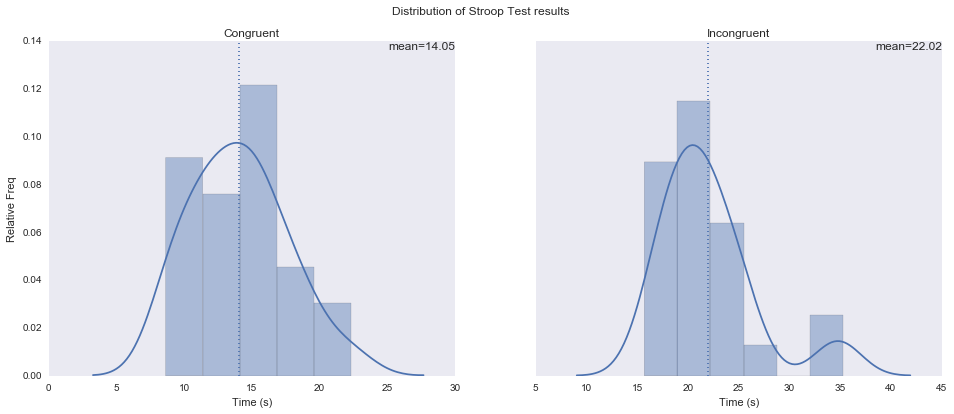

In [4]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), sharey=True)
f.suptitle('Distribution of Stroop Test results')
sns.distplot(df['Congruent'], ax=ax1)
mean_c = df['Congruent'].mean()
ax1.axvline(x=mean_c, linestyle='dotted')
ax1.text(1, 1, 'mean=%.2f' % mean_c, transform = ax1.transAxes, ha='right', va='top')
ax1.set_title('Congruent')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Relative Freq')


sns.distplot(df['Incongruent'], ax=ax2)
mean_i = df['Incongruent'].mean()
ax2.axvline(x=mean_i, linestyle='dotted')
ax2.text(1, 1, 'mean=%.2f' % mean_i, transform = ax2.transAxes, ha='right', va='top')
ax2.set_title('Incongruent')
ax2.set_xlabel('Time (s)')

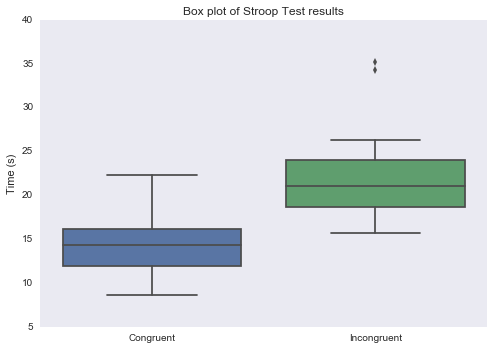

In [5]:
sns.boxplot(data=df[['Congruent','Incongruent']])
plt.title('Box plot of Stroop Test results')
plt.ylabel('Time (s)')

## Question 5
**Now, perform the statistical test and report your results.  What is your confidence level and your critical statistic value?**
> The confident level will be $95$% or $\alpha=.05$.

> The sample size is $n=24$, giving $23$ degrees of freedom.

> The $t$ critical value is $1.7139$

In [6]:
alpha = .05
t_crit = t.ppf(q=1 - alpha, df=23)
print 't-critical value = %.4f' % t_crit

t-critical value = 1.7139


> Calculate the $t$ statistic value for our difference of means.

> $$\bar{x}_i\text{ is the mean for the incongruent task}$$
> $$\bar{x}_c\text{ is the mean for the congruent task}$$
> $$s\text{ is the standard deviation of the differences between the congruent and incongruent tasks}$$
> $$n\text{ is the sample size}$$





> $$t=\frac{\bar{x}_i-\bar{x}_c} {\frac{s}{\sqrt{n}}}$$

> $$\bar{x}_i=22.02$$
> $$\bar{x}_c=14.05$$
> $$s=4.86$$
> $$n=24$$

> $$t=\frac{22.02-14.05} {\frac{4.86}{\sqrt{24}}}$$
> $$t=8.0207$$

In [7]:
x_c = df['Congruent'].mean()
x_i = df['Incongruent'].mean()
n = len(df.index)
ddof = n - 1
s = df['Difference'].std()

t_val = ((x_i - x_c) / (s / np.sqrt(n)))
print 't-value = %.4f' % t_val

t-value = 8.0207


> The test statistic value of $8.0207$ is greater than the critical value of $1.7139$.  The result should be to fail the null hypothesis.

> *See the below graph for a visual representation of this statistical test.*

> The computed $p$-value for this test statistic is effectively $0$.  This can be computed by taking $1 -$ the result of the cumulative distribution function value for the test statistic.
> $$p\text{-value} = 1 - CDF(8.0207) = 0.000000020515$$

> The probability that this value is not significantly different is $0.0000020515$%.

In [8]:
print 'p-value = %.12f' % (1 - t.cdf(t_val, ddof))

p-value = 0.000000020515


**Do you reject the null hypothesis or fail to reject it?**
> The null hypothesis should be rejected.  The mean for the Congruent task and Incongruent task is statistically different.  The alternative hypothesis that the mean for the Congruent task is statistically less than the Incongruent task should be accepted.

**Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?**
> The Incongruent task took participants significantly longer to complete compared to the Congruent task.  The expectation was that the Incongruent task was a mentally more challenging and would require more time to complete.  The results of this test support that expectation.

*Rubric:  A statistical test has been correctly performed and reported, including test statistic, p-value, and test result. The test results are interpreted in terms of the experimental task performed.*

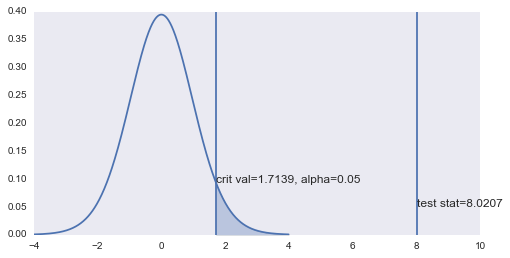

In [9]:
# plot t-distribution
x = np.arange(-4,4,.01)
y = t.pdf(x, ddof)
plt.figure(figsize=(8, 4))
plt.plot(x, y)

# show t-critical value
plt.axvline(x=t_crit)
plt.text(t_crit, t.pdf(t_crit, ddof), 'crit val=%.4f, alpha=%.2f' % (t_crit, alpha))

# shade area above critical value
x_tc = np.arange(t_crit, 4, .01)
y_tc = t.pdf(x_tc, ddof)
plt.fill_between(x_tc, y_tc, alpha=.3)

# plot test statistic
plt.axvline(x=t_val)
plt.text(t_val, .05, 'test stat=%.4f' % t_val)

## Question 6

**Optional: What do you think is responsible for the effects observed?  Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**
> I would assume that the incongruent task engages multiple parts of the brain to complete.  The language center is reading the word, but the visual (color identification) is also engaged.  When both parts of the brain come up with the same answer, everything goes smoothly.  When there is disagreement, there is an extra step to figure out which is the correct answer.

> A task that might be a good extension would be to test with numbers.  The congruent test might be "333" -> "Three" or "22" -> "Two".  The incongruent would be "44"-"Two" or "222"->"Three".  Participants would state the number of digits they see.

*Rubric:  Hypotheses regarding the reasons for the effect observed are presented. An extension or related experiment to the performed Stroop task is provided, that may produce similar effects.*

## References

> https://faculty.washington.edu/chudler/words.html#seffect